# Diagrama de bifurcação do mapa logístico

Vamos criar o diagrama de bifurcação para o mapa logístico

$$x_{t+1} = r x_t (1 - x_t).$$

Como sabemos, o espaço de estado é $x\in[0,1]$, e o valor de $r$ é limitado a $r\in[0,4]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Vamos usar o módulo `decimal`, para podermos trabalhar com precisão extendida. Especificamos uma precisão de 200 casas decimais.

In [2]:
from decimal import *
getcontext().prec = 200

Inicialmente, criamos uma função para retornar as iterações $x_t$ para $t=0,\ldots,t_\mathrm{max}$ do mapa logístico dados $r$ e $x_0$.

In [3]:
def iterate_logistic_map(r, x0, t_max):
    x = np.zeros(t_max+1) # from x[0] to x[t_max]
    x[0] = x0
    xt = Decimal(x0)
    r = Decimal(r)
    for t in range(t_max):
        xt = r * xt * (1 - xt)
        x[t+1] = float(xt)
    return x

Para achar os pontos fixos ou cíclos estáveis que nos interessam, precisamos encontrar quais os pontos atingidos depois que o transiente, que depende do ponto inicial, passou.

A convergência costuma ser rápida, mas como os cálculos são simples, vamos errar pelo lado da segurança e considerar que estamos no transiente nas primeiras 1500 iterações. Assim, precisamos descartar as iterações do transiente, e reter alguns valores posteriores. Vamos também reter 2500 valores após o transiente.

Desta forma, temos que iteragir para cada caso 2000 vezes ($t_\mathrm{max}=2000$) e descartar os valores de $t$ menores que 1500.

Os pontos cíclicos devem ser independentes do ponto inicial. Portanto, vamos usar um ponto inicial aleatório para $x_0$.

In [4]:
def periodic_points_logistic_map(r):
    x0 = np.random.random()
    x = iterate_logistic_map(r, x0, 2000)
    return x[1500:]

O processo agora consiste no seguinte:

1. Escolhemos uma precisão em $r$, isto é, quantos pontos distintos de valores de $r$ devem ser avaliados. Por questão de flexibilidade, vamos também permitir escolher mínimo e máximo do valor de $r$.
2. Para cada um dos valores de $r$, calcula seus pontos periódicos (usando a função acima).
3. Calculados os pontos periódicos, eles são plotados todos para o valor de $r$ a que correspondem.

In [5]:
def plot_bifurcation_logistic_map(n = 500, r_min = 0.0, r_max = 4.0, save=True):
    from matplotlib import rcParams
    rcParams.update({'font.size': 22})
    rs = np.linspace(r_min, r_max, n)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 12)
    r0 = 1
    r1 = 3
    r2 = 1+np.sqrt(6)
    rinf = 3.5699456
    if r_min < r0 < r_max:
        ax.axvline(r0, color='red', alpha=0.3)
    if r_min < r1 < r_max:
        ax.axvline(r1, color='red', alpha=0.3)
    if r_min < r2 < r_max:
        ax.axvline(r2, color='red', alpha=0.3)
    if r_min < rinf < r_max:
        ax.axvline(rinf, color='green', alpha=0.5)
    for r in rs:
        periodic_r = periodic_points_logistic_map(r)
        many_r = np.full(periodic_r.size, r)
        ax.plot(many_r, periodic_r, ',b')
    ax.set_ylim(0, 1)
    ax.set_xlabel(r'$r$')
    ax.set_ylabel('Periodic points')
    plt.grid(True)
    if save:
        fig.savefig(f'bifurcation_logistic_{r_min}_{r_max}_{n}.png', dpi=72)

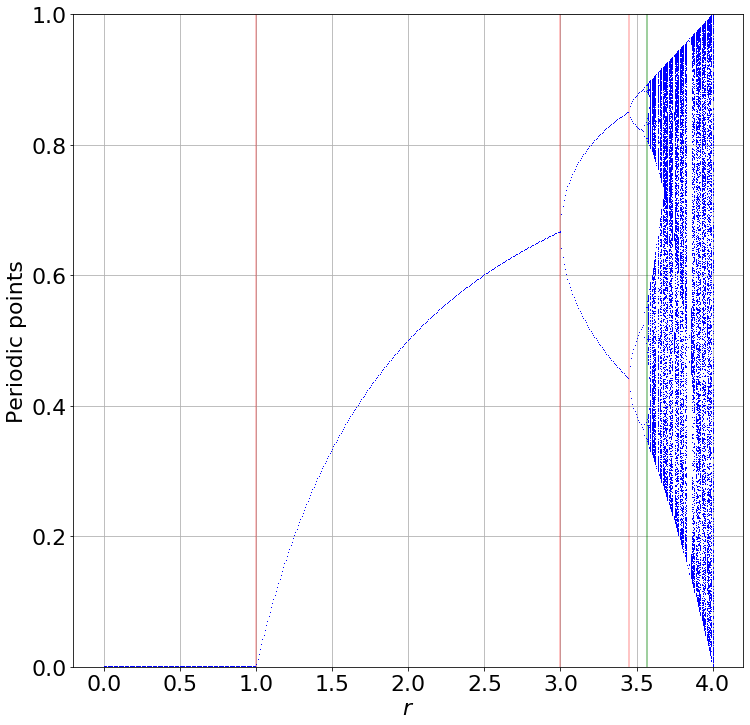

In [6]:
plot_bifurcation_logistic_map()